In [2]:
import pandas as pd
from fbprophet import Prophet

In [10]:
# data from 2019-05-01 to 2021-06-12
df = pd.read_csv('/Downloads/BTC-USD.csv')
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
print(df)

             ds             y
0    2019-05-01   5402.697266
1    2019-05-02   5505.283691
2    2019-05-03   5768.289551
3    2019-05-04   5831.167480
4    2019-05-05   5795.708496
..          ...           ...
769  2021-06-08  33472.632813
770  2021-06-09  37345.121094
771  2021-06-10  36702.597656
772  2021-06-11  37334.398438
773  2021-06-12  35552.515625

[774 rows x 2 columns]


In [11]:
# try Prophet for forecast based on historical data
prophet = Prophet()
prophet.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
# forecast next 15 days
fc_future = prophet.make_future_dataframe(periods=15)
print(fc_future)

            ds
0   2019-05-01
1   2019-05-02
2   2019-05-03
3   2019-05-04
4   2019-05-05
..         ...
784 2021-06-23
785 2021-06-24
786 2021-06-25
787 2021-06-26
788 2021-06-27

[789 rows x 1 columns]


In [28]:
# run forecast
forecast = prophet.predict(fc_future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(20)
# print(forecast)

,ds,yhat,yhat_lower,yhat_upper
769,2021-06-08,39868.833511,37094.021547,42670.989941
770,2021-06-09,39832.054464,37090.916599,42608.214535
771,2021-06-10,39746.514731,37033.234454,42549.330737
772,2021-06-11,39798.937753,37126.280996,42460.724882
773,2021-06-12,39736.934548,36969.675617,42867.576991
774,2021-06-13,39615.300686,36892.495516,42204.391278
775,2021-06-14,39670.880781,36804.700898,42497.997410
776,2021-06-15,39607.961879,36866.123692,42324.966398
777,2021-06-16,39586.736084,36931.567170,42508.624210
778,2021-06-17,39500.548206,36781.299229,42453.020905


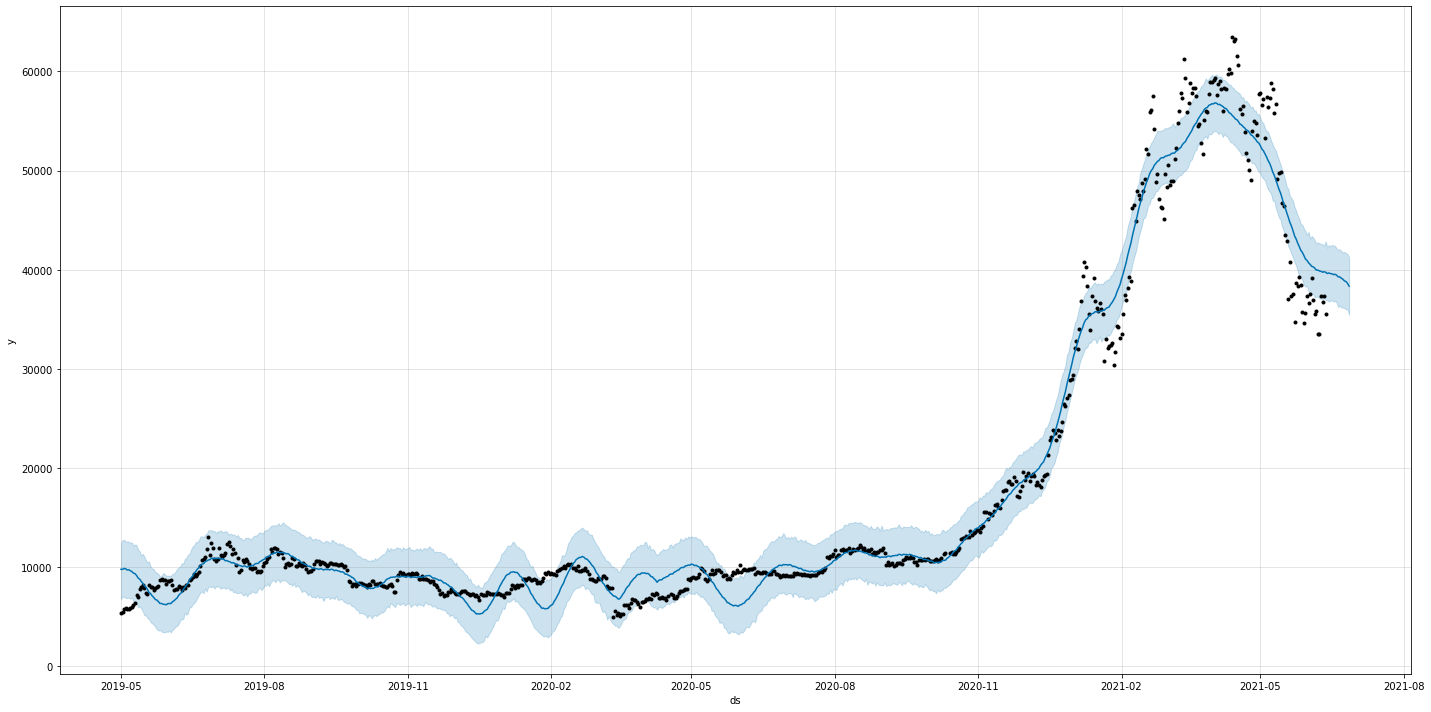

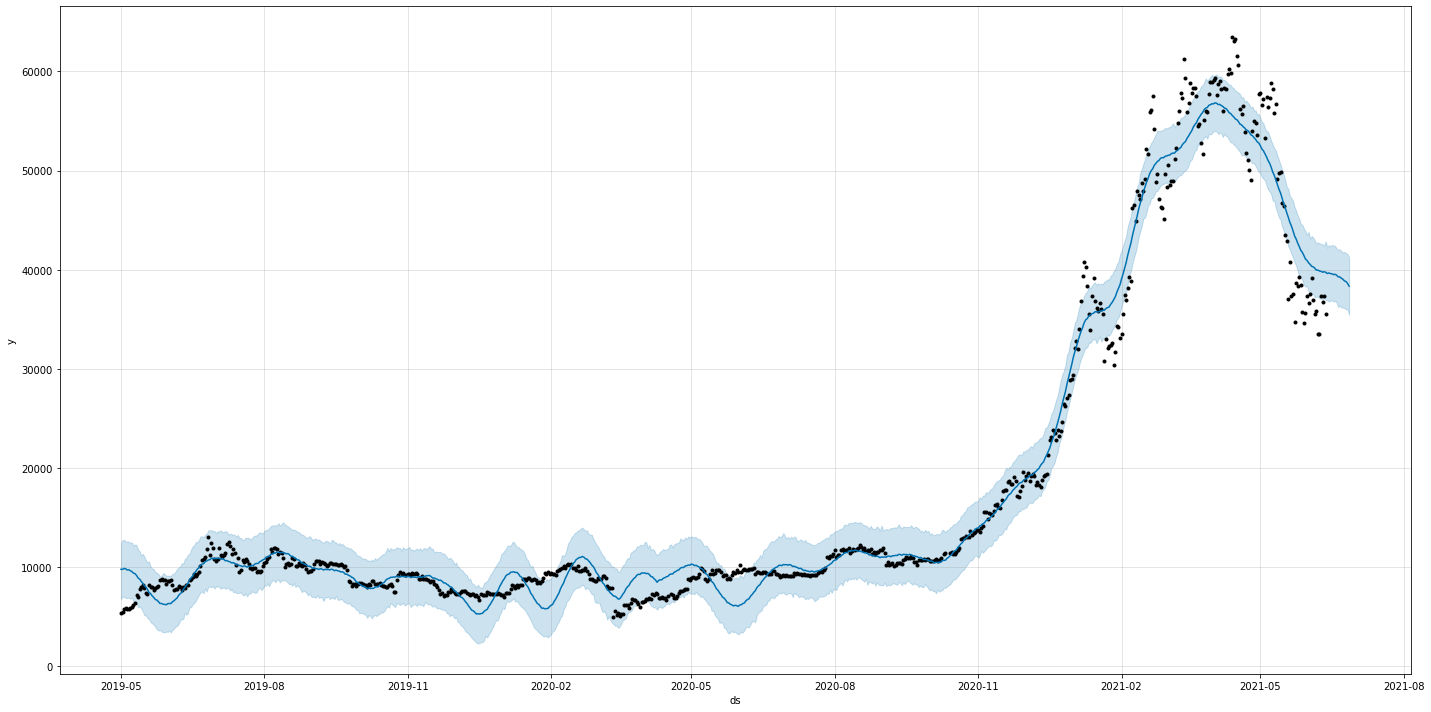

In [29]:
# simple visualization
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))